In [10]:
import pandas as pd
import numpy as np
from datetime import datetime


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
scratch_df = pd.read_csv('scratch_df.csv')


class_etape_df = pd.read_csv('class_etape_df.csv')


In [5]:
def race_dynamics_plot(scratch_df,race,year):
    
    filtered_df = scratch_df[scratch_df['Race'] == race & scratch_df['year'] == year]
    # Get unique values in the "Event" column
    unique_events = filtered_df['Event'].unique()

    # Create a line plot for each unique event
    for event in unique_events:
        event_df = filtered_df[filtered_df['Event'] == event]

        # Create a subplot for each row in event_df
        plt.figure(figsize=(18, 10))
        for index, row in event_df.iterrows():
            x_values = ['Gap to 1st CaP1 (s)', 'Gap to 1st Vélo Cum. (s)', 'Gap to 1st Total (s)']
            y_values = [row[x] for x in x_values]
            plt.plot(x_values, y_values, label=event_df["Rang"][index])

        # Customize the plot
        plt.title(f'Event: {event}')
        plt.xlabel('Gap Type')
        plt.ylabel('Gap (seconds)')
        plt.legend()

        # Show or save the plot as needed
        plt.show()

# 1.1 Visualization for each part of the race

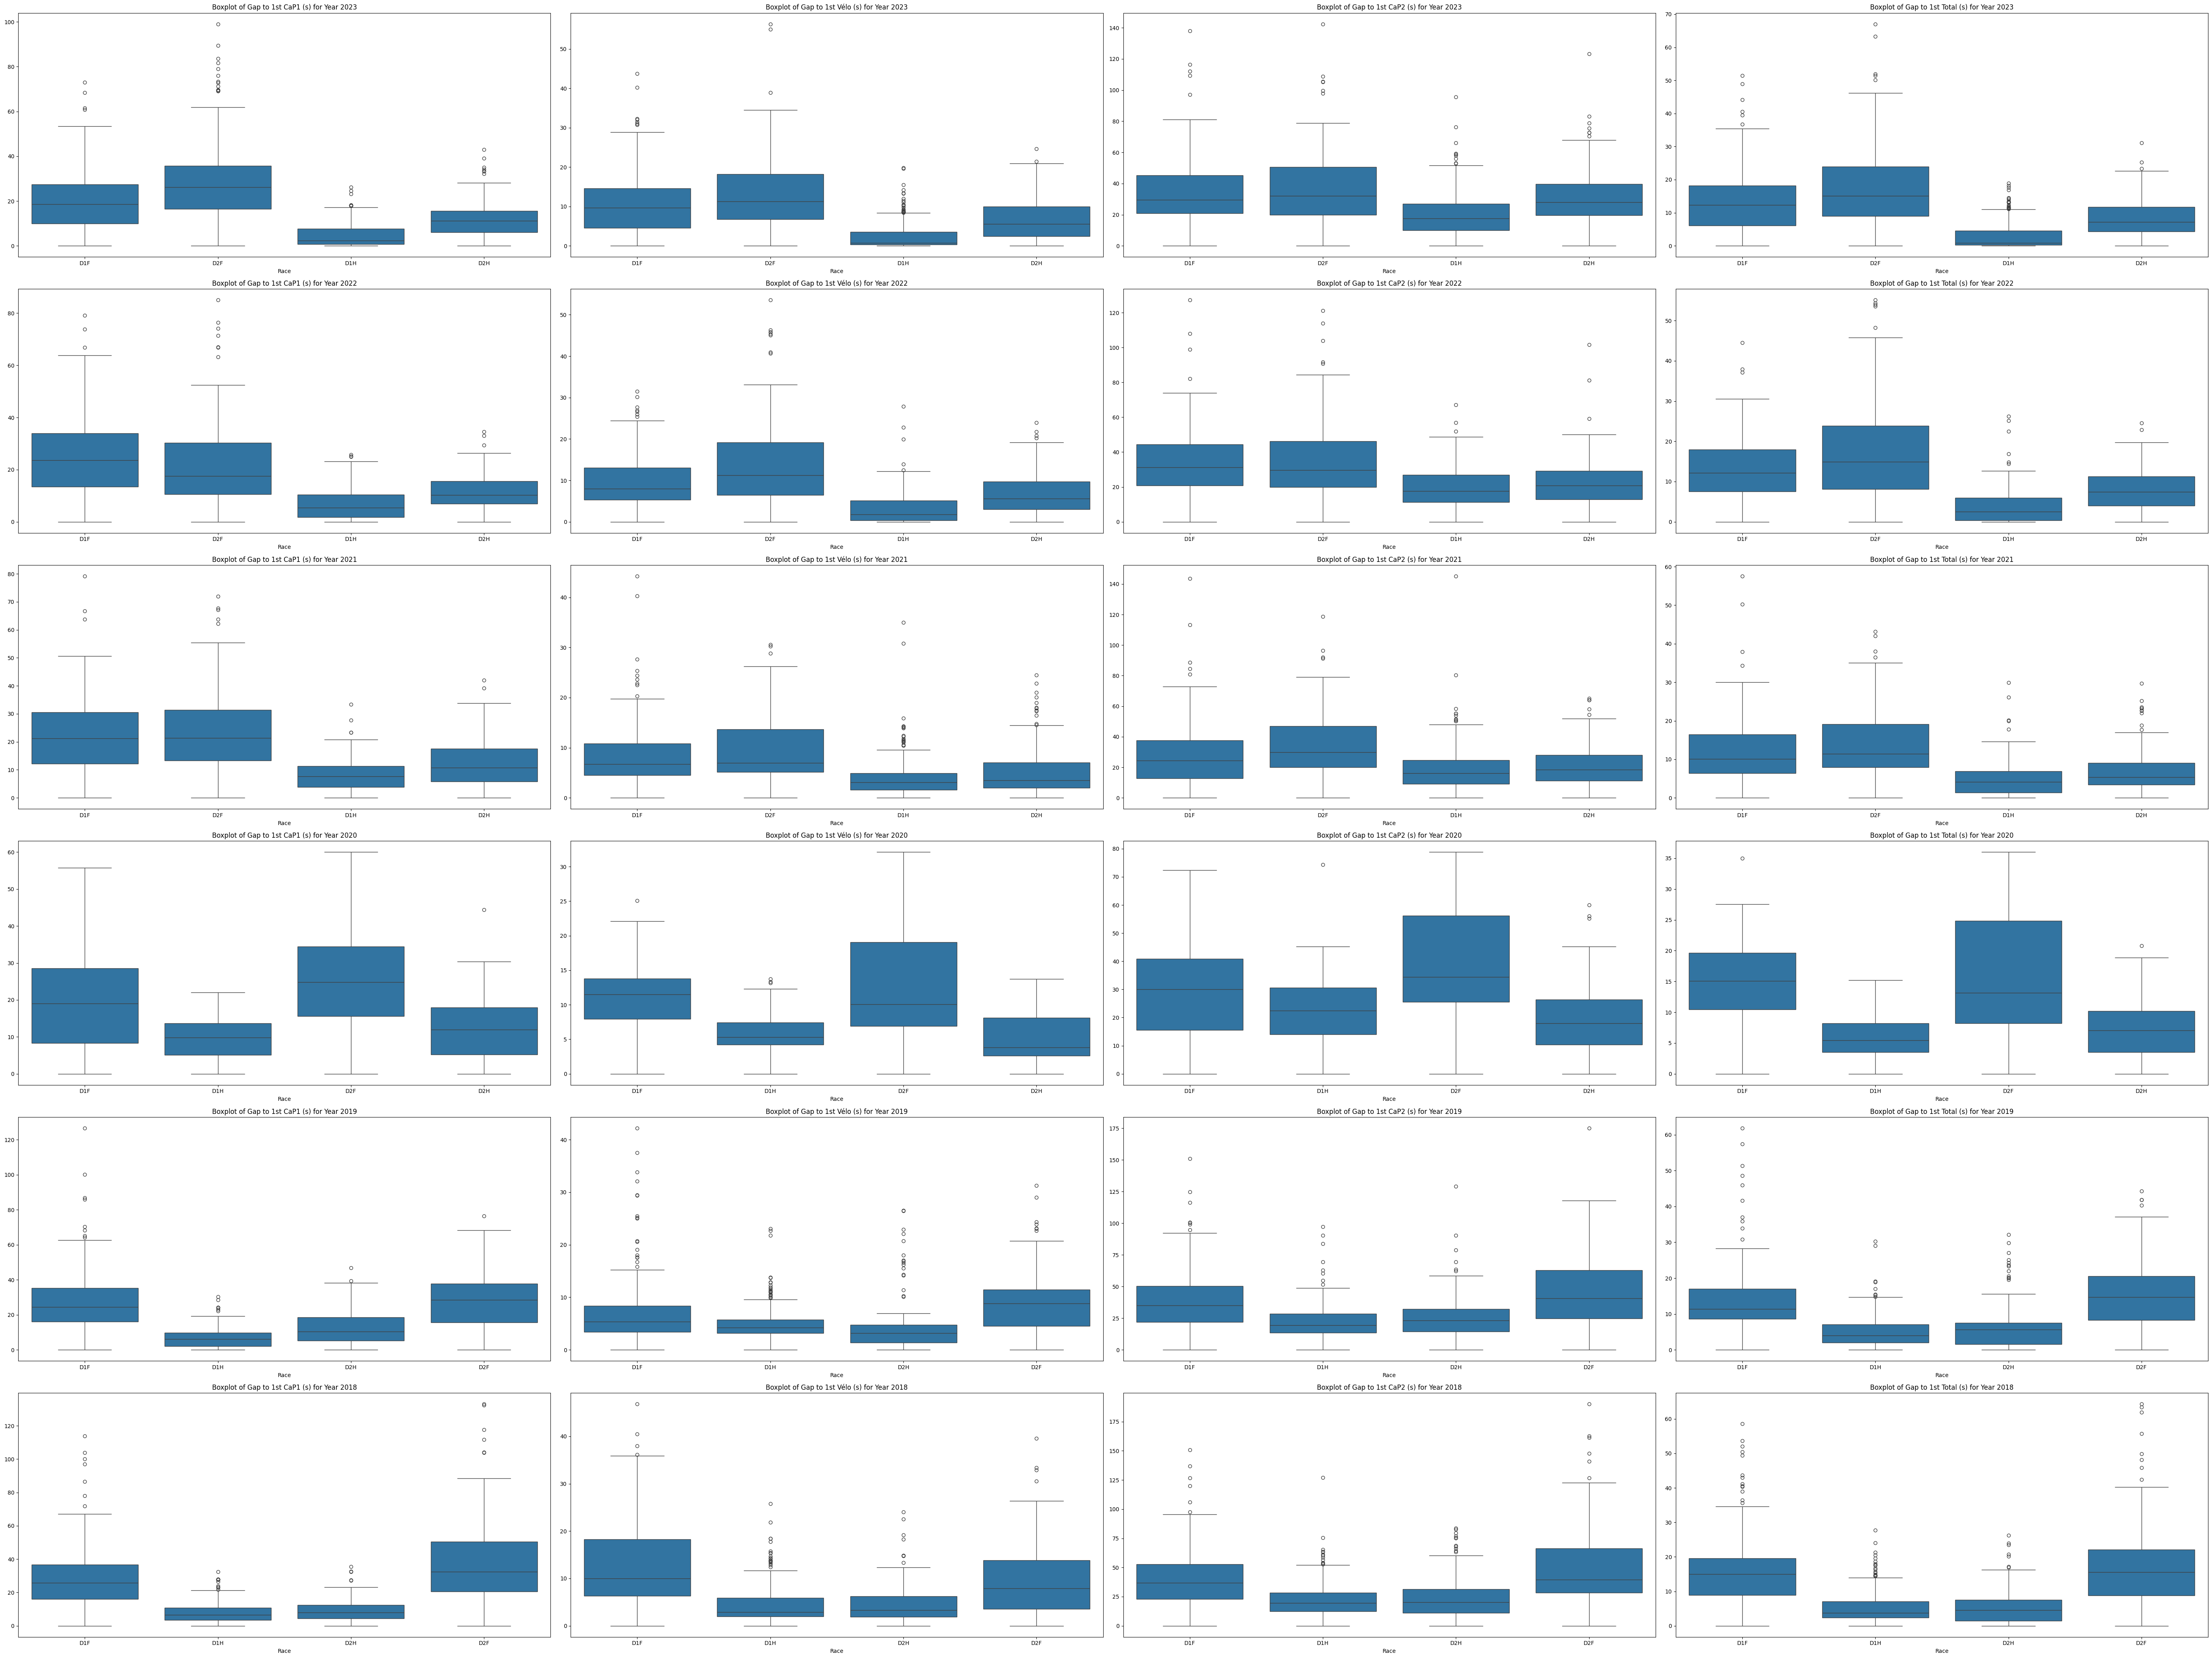

In [22]:
# Specify the column you want to use for the boxplot
data_columns = ['Gap to 1st CaP1 (s/km)', "Gap to 1st Vélo (s/km)", "Gap to 1st CaP2 (s/km)", "Gap to 1st Total (s/km)"]

# Get unique years
unique_years = scratch_df['year'].unique()

# Create subplots for each unique year
fig, axes = plt.subplots(nrows=len(unique_years), ncols=len(data_columns), figsize=(14 * len(data_columns), 7 * len(unique_years)))

# Iterate through unique years and create boxplots
for year_idx, year in enumerate(unique_years):
    data_subset = scratch_df[scratch_df['year'] == year]
    for col_idx, column in enumerate(data_columns):
        data_subset = data_subset.dropna(subset=[column])  # Remove rows with missing values in the current column
        sns.boxplot(x='Race', y=column, data=data_subset, ax=axes[year_idx][col_idx], hue_order=["D1H", "D2H", "D1F", "D2F"])
        axes[year_idx][col_idx].set_title(f'Boxplot of {column} for Year {year}')
        axes[year_idx][col_idx].set_xlabel('Race')
        axes[year_idx][col_idx].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


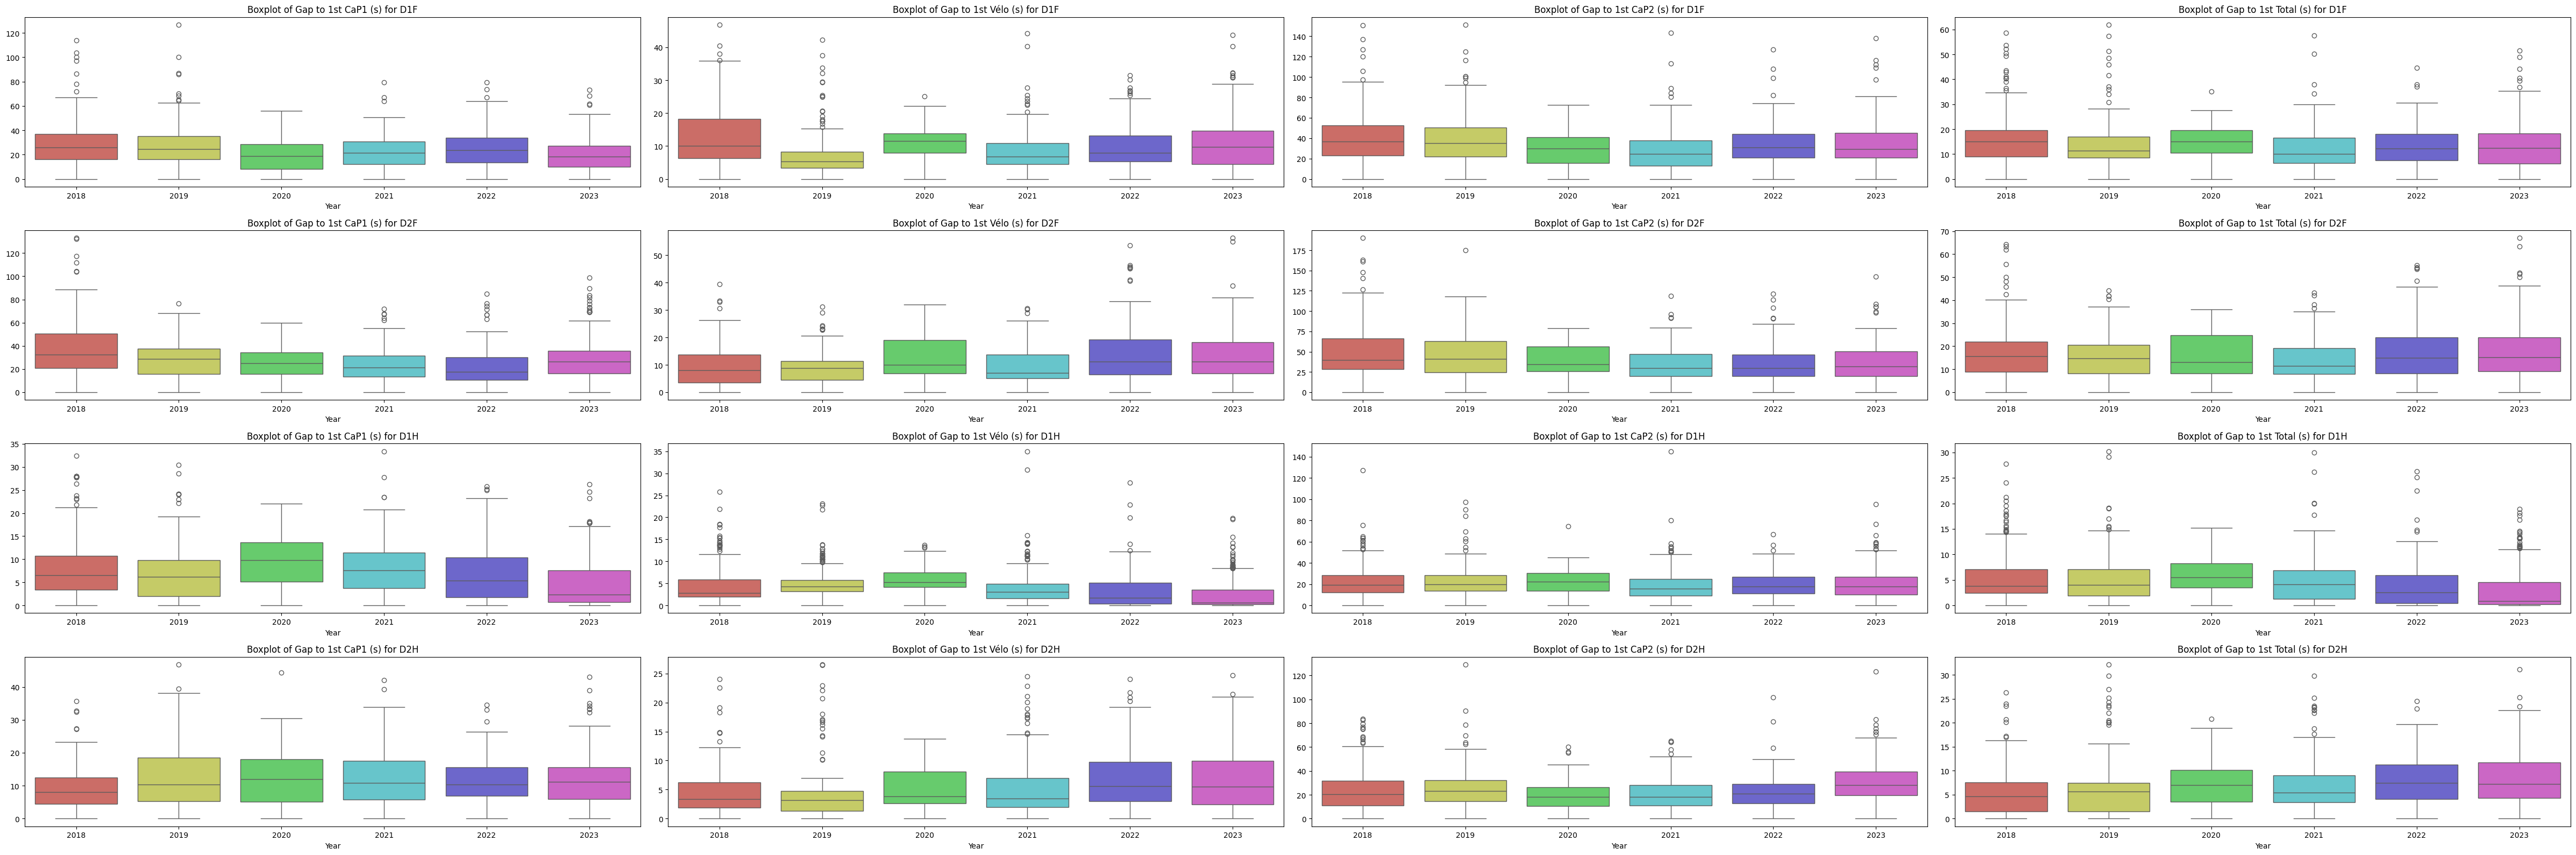

In [25]:
data_columns = ['Gap to 1st CaP1 (s/km)', "Gap to 1st Vélo (s/km)", "Gap to 1st CaP2 (s/km)", "Gap to 1st Total (s/km)"]

# Get unique races
unique_races = scratch_df['Race'].unique()

# Create subplots for each unique race and each data column
fig, axes = plt.subplots(nrows=len(unique_races), ncols=len(data_columns), figsize=(12 * len(data_columns), 4 * len(unique_races)))

# Iterate through unique races and create boxplots
for race_idx, race in enumerate(unique_races):
    data_subset = scratch_df[scratch_df['Race'] == race]
    for col_idx, column in enumerate(data_columns):
        data_subset = data_subset.dropna(subset=[column])  # Remove rows with missing values in the current column
        sns.boxplot(x='year', y=column, data=data_subset, ax=axes[race_idx][col_idx], hue_order=["2023", "2022", "2021", "2020", "2019", "2018"], palette="hls")
        axes[race_idx][col_idx].set_title(f'Boxplot of {column} for {race}')
        axes[race_idx][col_idx].set_xlabel('Year')
        axes[race_idx][col_idx].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


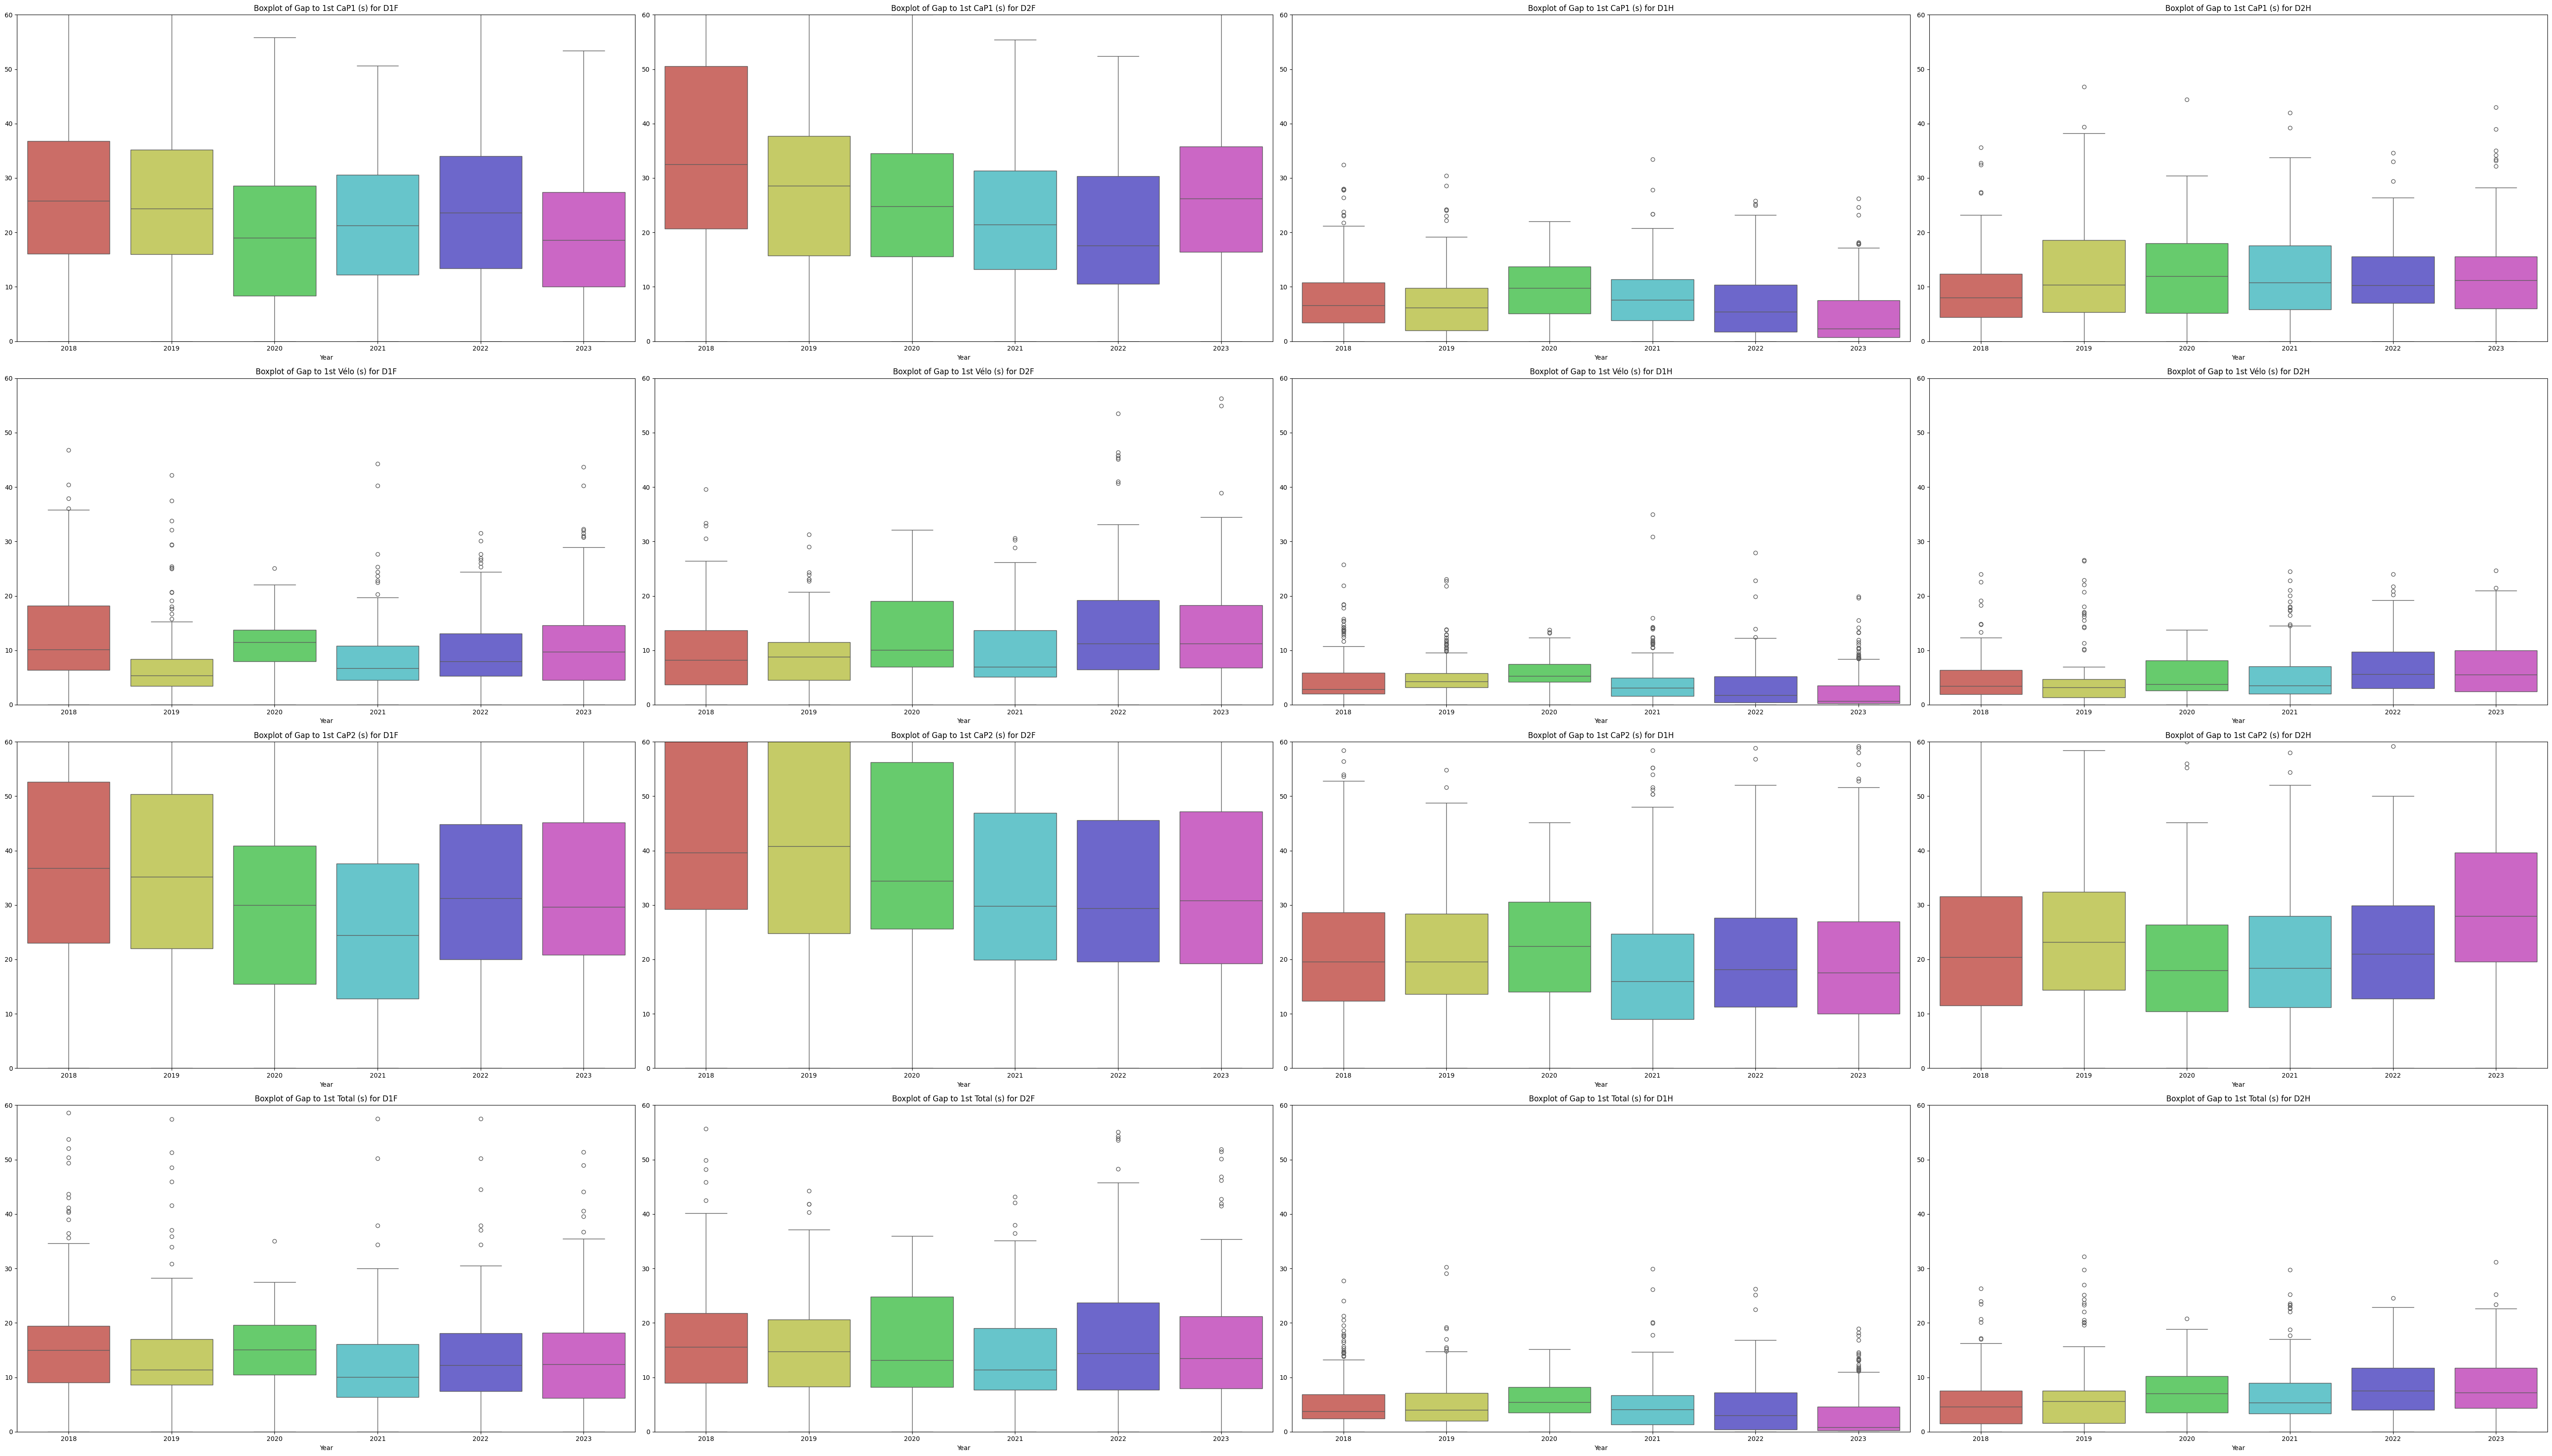

In [34]:
data_columns = ['Gap to 1st CaP1 (s/km)', "Gap to 1st Vélo (s/km)", "Gap to 1st CaP2 (s/km)", "Gap to 1st Total (s/km)"]

# Get unique races
unique_races = scratch_df['Race'].unique()

# Create subplots for each unique data column and each race
fig, axes = plt.subplots(nrows=len(data_columns), ncols=len(unique_races), figsize=(14 * len(unique_races), 8 * len(data_columns)))

# Iterate through unique data columns and create boxplots
for col_idx, column in enumerate(data_columns):
    for race_idx, race in enumerate(unique_races):
        data_subset = scratch_df[(scratch_df['Race'] == race) & (~scratch_df[column].isnull())]
        sns.boxplot(x='year', y=column, data=data_subset, ax=axes[col_idx][race_idx], hue_order=["2023", "2022", "2021", "2020", "2019", "2018"], palette="hls")
        axes[col_idx][race_idx].set_title(f'Boxplot of {column} for {race}')
        axes[col_idx][race_idx].set_xlabel('Year')
        axes[col_idx][race_idx].set_ylabel('')
        # Set the y-axis limits for each subplot
        axes[col_idx][race_idx].set_ylim(0, 60)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


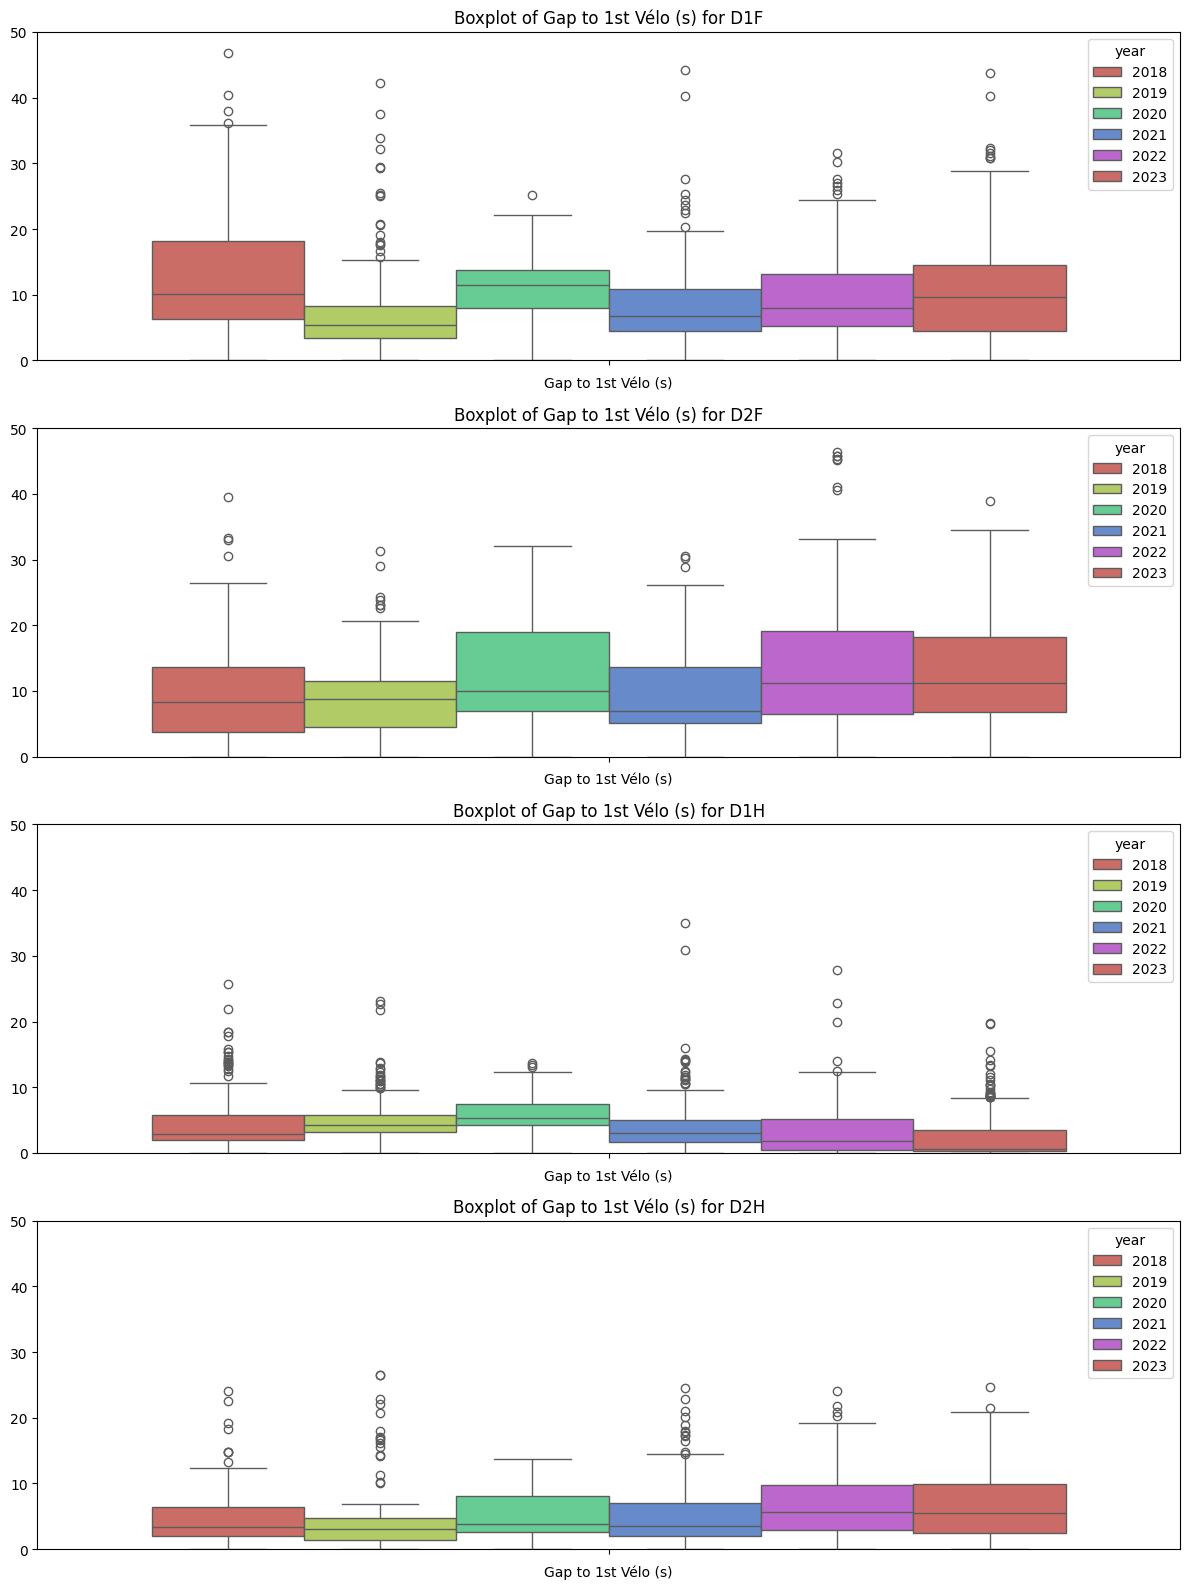

In [18]:
data_column = 'Gap to 1st Vélo (s)'

# Get unique years
unique_races = scratch_df['Race'].unique()

# Create subplots for each unique year
fig, axes = plt.subplots(nrows=len(unique_races), ncols=1, figsize=(12, 4 * len(unique_races)))
#palette = {'D1H': 'red', 'D2H': 'green', 'D1F': 'blue','D2F': 'yellow'} 
# Iterate through unique years and create boxplots
for i, race in enumerate(unique_races):
    data_subset = scratch_df[scratch_df['Race'] == race]
    data_subset.dropna(subset=[data_column], inplace=True)
    sns.boxplot(y=data_subset[data_column], ax=axes[i], hue = data_subset["year"],hue_order=["2023","2022","2021","2020","2019","2018"],palette ="hls")
    axes[i].set_title(f'Boxplot of {data_column} for {race}')
    axes[i].set_xlabel(data_column)
    axes[i].set_ylabel('')  # Clear the y-axis label
    
for ax in axes:
    ax.set_ylim(0, 50)
# Adjust spacing between subplots
plt.tight_layout()

plt.show()

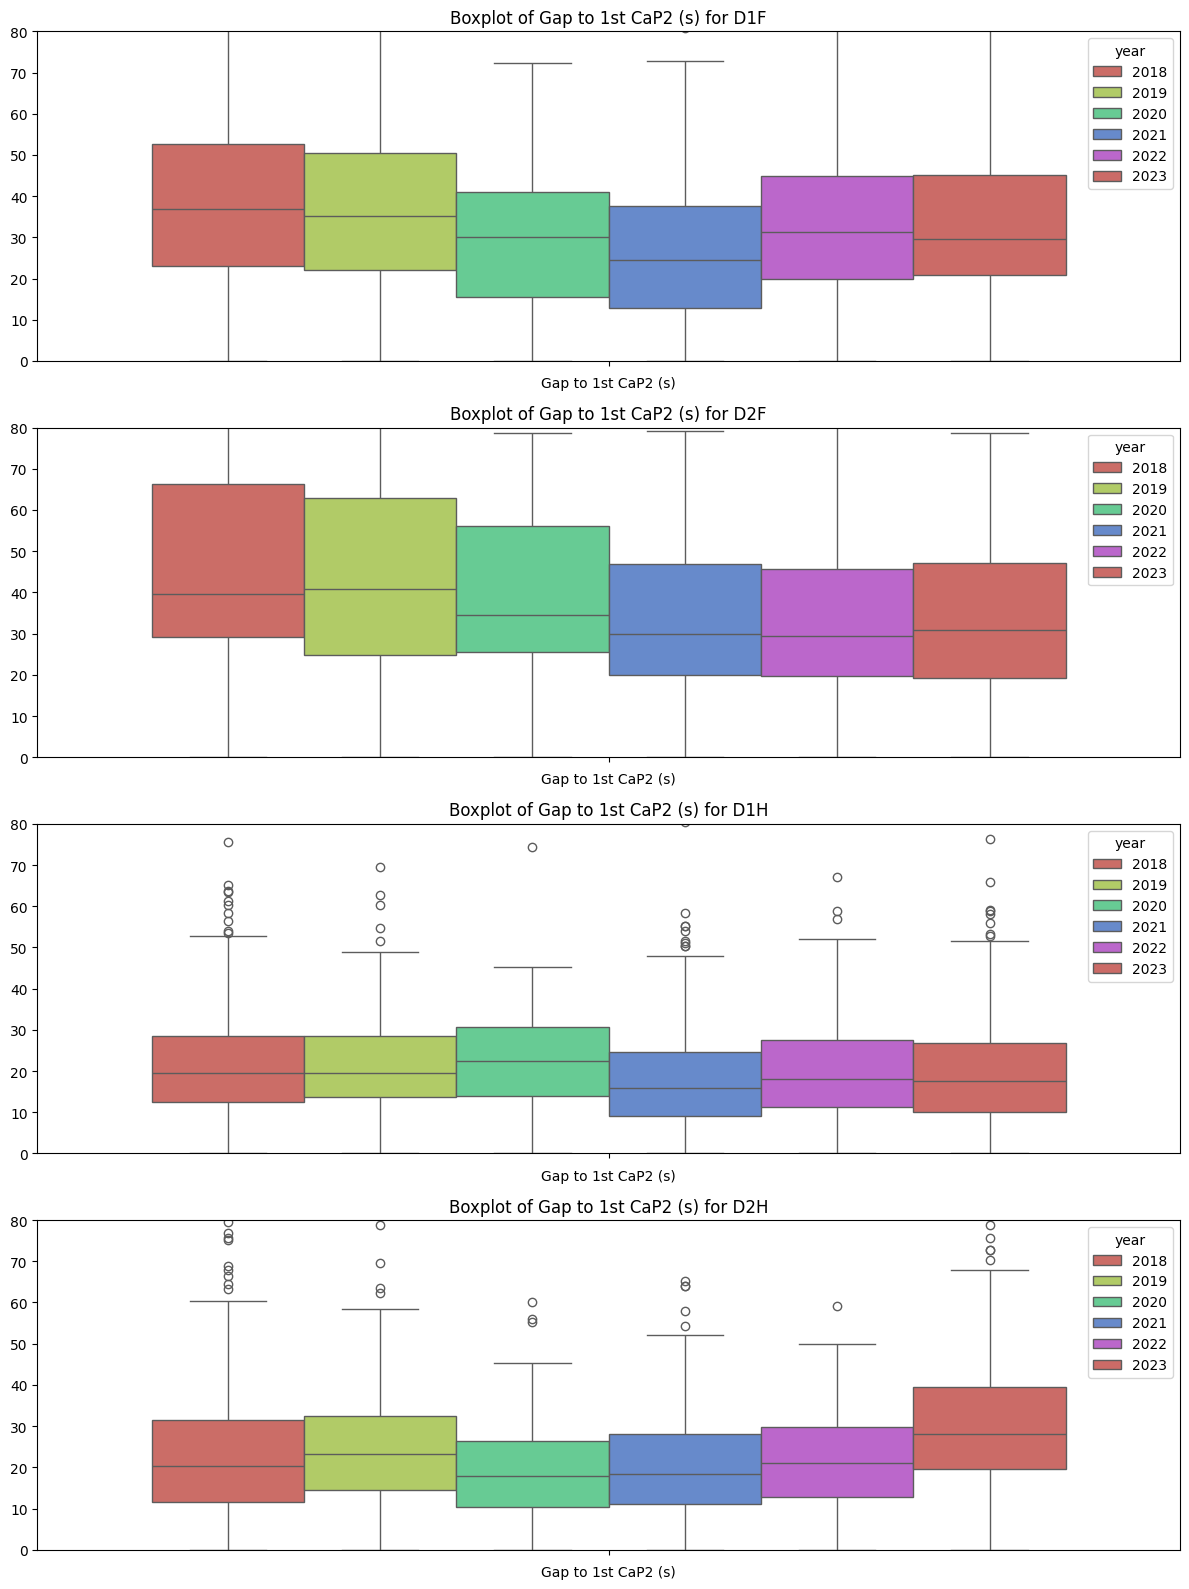

In [19]:
data_column = 'Gap to 1st CaP2 (s)'

# Get unique years
unique_races = scratch_df['Race'].unique()

# Create subplots for each unique year
fig, axes = plt.subplots(nrows=len(unique_races), ncols=1, figsize=(12, 4 * len(unique_races)))
#palette = {'D1H': 'red', 'D2H': 'green', 'D1F': 'blue','D2F': 'yellow'} 
# Iterate through unique years and create boxplots
for i, race in enumerate(unique_races):
    data_subset = scratch_df[scratch_df['Race'] == race]
    data_subset.dropna(subset=[data_column], inplace=True)
    sns.boxplot(y=data_subset[data_column], ax=axes[i], hue = data_subset["year"],hue_order=["2023","2022","2021","2020","2019","2018"],palette ="hls")
    axes[i].set_title(f'Boxplot of {data_column} for {race}')
    axes[i].set_xlabel(data_column)
    axes[i].set_ylabel('')  # Clear the y-axis label
    
for ax in axes:
    ax.set_ylim(0, 80)
# Adjust spacing between subplots
plt.tight_layout()

plt.show()

In [16]:
race_dynamics_plot(scratch_df,"D1H",2023)

TypeError: Cannot perform 'rand_' with a dtyped [int64] array and scalar of type [bool]